### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. 


### `Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
from scipy.stats import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
# If you don't want to change your default settings, and you only want to change the width of 
# the current notebook you're working on, you can enter the following into a cell:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Update default style
# Set the aesthetic style of the plots.
# This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
sns.set_style(style='darkgrid')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# Load the data into pandas dataframe
df_rating = pd.read_csv("Data.csv")
df_movie = pd.read_csv("item.csv")
df_user = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
#
# Rating (Data.csv)
#
# Seems like there are no missing values (null data) in this data set
#

In [5]:
df_rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
df_rating.shape

(100000, 4)

In [8]:
df_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,"100,000.00",462.48,266.61,1.00,254.00,447.00,682.00,943.00
movie id,"100,000.00",425.53,330.80,1.00,175.00,322.00,631.00,"1,682.00"
rating,"100,000.00",3.53,1.13,1.00,3.00,4.00,4.00,5.00
timestamp,"100,000.00","883,528,851.49","5,343,856.19","874,724,710.00","879,448,709.50","882,826,944.00","888,259,984.00","893,286,638.00"


In [9]:
#
# Movie (item.csv)
#
# Column "unknown" may be missing value
#

In [10]:
df_movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
df_movie.shape

(1681, 22)

In [13]:
df_movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,"1,681.00",841.84,485.64,1.00,422.00,842.00,"1,262.00","1,682.00"
unknown,"1,681.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Action,"1,681.00",0.15,0.36,0.00,0.00,0.00,0.00,1.00
Adventure,"1,681.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
Animation,"1,681.00",0.02,0.16,0.00,0.00,0.00,0.00,1.00
Childrens,"1,681.00",0.07,0.26,0.00,0.00,0.00,0.00,1.00
Comedy,"1,681.00",0.30,0.46,0.00,0.00,0.00,1.00,1.00
Crime,"1,681.00",0.06,0.25,0.00,0.00,0.00,0.00,1.00
Documentary,"1,681.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
Drama,"1,681.00",0.43,0.50,0.00,0.00,0.00,1.00,1.00


In [14]:
#
# User (user.csv)
#
# Seems like there are no missing values (null data) in this data set
#

In [15]:
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
df_user.shape

(943, 5)

In [18]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.00,472.00,272.36,1.00,236.50,472.00,707.50,943.00
age,943.00,34.05,12.19,7.00,25.00,31.00,43.00,73.00


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [19]:
#
# Get sum of each genre to find the number of movies per genre (using sum since each genre count in the original data is 1 (one))
#
df_movie.iloc[:,3:].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [20]:
# Find the movie which genre is "unknown"
df_movie[df_movie["unknown"]==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Drop the movie where the genre is "unknown"
df_movie.drop(1371, inplace = True)

In [22]:
# Make sure that the moview where the genre is "unknown" is successfully dropped
# -> The moview where the genre is "unknown" is successfully dropped
df_movie[df_movie["unknown"]==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [23]:
# Column "unknown" is no more needed
df_movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Drop the column "unknown" itself
df_movie.drop(['unknown'], axis=1, inplace=True)

In [25]:
# The column "unknown" is successfully dropped from the dataframe
df_movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Check the info again
# -> Looks good
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [27]:
# Add a new column "Num of genre" in the dataframe
# Use iloc to exclude "id" from sum (don't want to add id as a number of genre)
df_movie["Num of genre"] = df_movie.iloc[:,3:].sum(axis=1)

In [28]:
df_movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3


In [29]:
#
# Movie name and number of genres for the movie in dataframe
#
df_movie[["movie title", "Num of genre"]]

,movie title,Num of genre
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [30]:
# Movies which have more than one genres
df_movie[df_movie["Num of genre"]>1]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [31]:
#
# Total number of movies which have more than one genres
#
df_movie[df_movie["Num of genre"]>1]["movie title"].count()

849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [32]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [33]:
#
# Rating
#

In [34]:
df_rating['rating'].value_counts(normalize=True)

4   0.34
3   0.27
5   0.21
2   0.11
1   0.06
Name: rating, dtype: float64

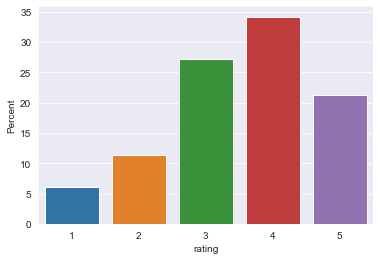

In [35]:
#
# Uniraviate plot of Rating
#
rating_chart = sns.barplot(x="rating", y="rating", data=df_rating, estimator=lambda x: len(x)/len(df_rating)*100)
rating_chart.set(ylabel="Percent");

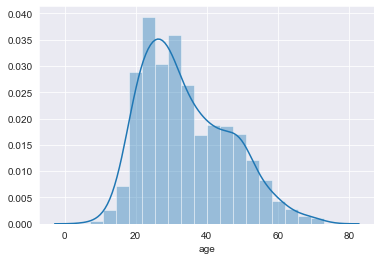

In [36]:
#
# Uniraviate plot of Age
#
sns.distplot(df_user['age']);

In [37]:
#
# Release Year
#

In [38]:
# Check the format of "release date"
# -> Can be splitted by "-"
df_movie['release date'].head()

0    01-Jan-1995
1    01-Jan-1995
2    01-Jan-1995
3    01-Jan-1995
4    01-Jan-1995
Name: release date, dtype: object

In [39]:
# Test
df_movie['release date'][0].split('-')[2]

'1995'

In [40]:
# Apply split to the Series
df_movie['release date'].map(lambda x: x.split('-')[2])

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release date, Length: 1680, dtype: object

In [41]:
df_movie['release year'] = df_movie['release date'].map(lambda x: x.split('-')[2])

In [42]:
df_movie['release year'].unique()

array(['1995', '1996', '1994', '1967', '1977', '1993', '1965', '1982',
       '1990', '1992', '1991', '1937', '1997', '1981', '1970', '1972',
       '1961', '1939', '1941', '1968', '1969', '1954', '1971', '1988',
       '1973', '1979', '1987', '1986', '1989', '1974', '1980', '1985',
       '1966', '1957', '1960', '1984', '1983', '1975', '1998', '1940',
       '1950', '1964', '1951', '1962', '1933', '1956', '1963', '1958',
       '1945', '1976', '1978', '1959', '1942', '1953', '1946', '1955',
       '1938', '1934', '1949', '1948', '1943', '1944', '1936', '1935',
       '1930', '1952', '1931', '1922', '1947', '1932', '1926'],
      dtype=object)

In [43]:
df_movie['release year'].nunique()

71

In [44]:
df_movie['release year'].sort_values()

673     1922
1540    1926
615     1930
654     1931
1122    1932
        ... 
912     1998
913     1998
914     1998
1590    1998
1104    1998
Name: release year, Length: 1680, dtype: object

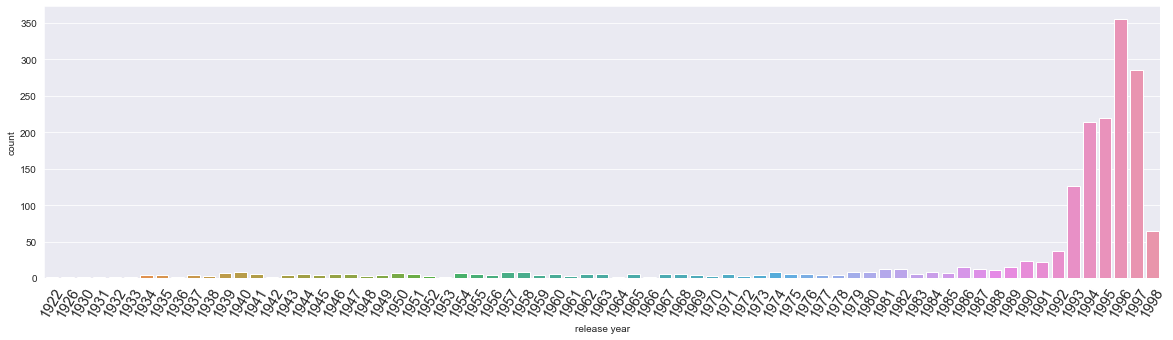

In [45]:
#
# Uniraviate plot of Release Year
# 
plt.figure(figsize=(20,5))
year_chart = sns.countplot(df_movie['release year'].sort_values())

year_chart.set_xticklabels(
    labels=year_chart.get_xticklabels(),
    rotation=60,
    fontweight='light',
    fontsize='x-large'
);

In [46]:
#
# Gender
#

In [47]:
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [48]:
df_user['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [49]:
df_user['gender'].value_counts(normalize=True)

M   0.71
F   0.29
Name: gender, dtype: float64

In [50]:
# Convert non-numeric (Categorical) data into numeric data
df_user = pd.get_dummies(df_user, columns=['gender'])

In [51]:
df_user.head()

,user id,age,occupation,zip code,gender_F,gender_M
0,1,24,technician,85711,0,1
1,2,53,other,94043,1,0
2,3,23,writer,32067,0,1
3,4,24,technician,43537,0,1
4,5,33,other,15213,1,0


In [52]:
#(0:Male, 1:Female)
df_user['gender_F'].value_counts(normalize=True)

0   0.71
1   0.29
Name: gender_F, dtype: float64

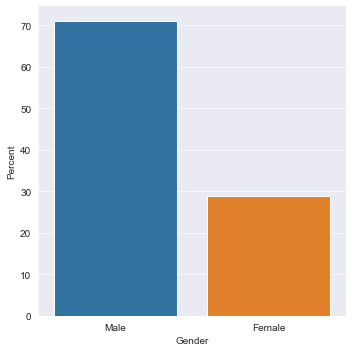

In [53]:
#
# Uniraviate plot of Gender
#
gender_chart = sns.catplot(
    x="gender_F", 
    y="gender_F", 
    kind="bar", 
    data=df_user, 
    estimator=lambda x: len(x)/len(df_user)*100
)
gender_chart.set_axis_labels("Gender", "Percent").set_xticklabels(["Male", "Female"]);

In [54]:
#
# Occupation
#

In [55]:
df_user.head()

,user id,age,occupation,zip code,gender_F,gender_M
0,1,24,technician,85711,0,1
1,2,53,other,94043,1,0
2,3,23,writer,32067,0,1
3,4,24,technician,43537,0,1
4,5,33,other,15213,1,0


In [56]:
df_user['occupation'].value_counts(normalize=True)

student         0.21
other           0.11
educator        0.10
administrator   0.08
engineer        0.07
programmer      0.07
librarian       0.05
writer          0.05
executive       0.03
scientist       0.03
artist          0.03
technician      0.03
marketing       0.03
entertainment   0.02
healthcare      0.02
retired         0.01
salesman        0.01
lawyer          0.01
none            0.01
doctor          0.01
homemaker       0.01
Name: occupation, dtype: float64

In [57]:
le = LabelEncoder()
df_user['occupation_id'] = le.fit_transform(df_user['occupation'])

In [58]:
df_user['occupation_id'].value_counts(normalize=True)

18   0.21
13   0.11
3    0.10
0    0.08
4    0.07
14   0.07
10   0.05
20   0.05
6    0.03
17   0.03
1    0.03
19   0.03
11   0.03
5    0.02
7    0.02
15   0.01
9    0.01
16   0.01
12   0.01
8    0.01
2    0.01
Name: occupation_id, dtype: float64

In [59]:
df_user['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [60]:
df_user['occupation_id'].unique()

array([19, 13, 20,  6,  0, 18,  9,  3, 17,  5, 14, 10,  8,  1,  4, 11, 12,
        7, 15, 16,  2])

In [61]:
column_list = ['occupation_id', 'occupation']

In [62]:
zipped = list(zip(column_list, [df_user['occupation'].unique(), df_user['occupation_id'].unique()]))

In [63]:
data = dict(zipped)

In [64]:
occupation_id_map = pd.DataFrame(data)

In [65]:
occupation_id_map.sort_values('occupation')

,occupation_id,occupation
4,administrator,0
13,artist,1
20,doctor,2
7,educator,3
14,engineer,4
9,entertainment,5
3,executive,6
17,healthcare,7
12,homemaker,8
6,lawyer,9


In [66]:
xindex = occupation_id_map.sort_values('occupation')['occupation_id']

In [67]:
xindex

4     administrator
13           artist
20           doctor
7          educator
14         engineer
9     entertainment
3         executive
17       healthcare
12        homemaker
6            lawyer
11        librarian
15        marketing
16             none
1             other
10       programmer
18          retired
19         salesman
8         scientist
5           student
0        technician
2            writer
Name: occupation_id, dtype: object

In [68]:
df_user['occupation'].value_counts(normalize=True)

student         0.21
other           0.11
educator        0.10
administrator   0.08
engineer        0.07
programmer      0.07
librarian       0.05
writer          0.05
executive       0.03
scientist       0.03
artist          0.03
technician      0.03
marketing       0.03
entertainment   0.02
healthcare      0.02
retired         0.01
salesman        0.01
lawyer          0.01
none            0.01
doctor          0.01
homemaker       0.01
Name: occupation, dtype: float64

<Figure size 1440x360 with 0 Axes>

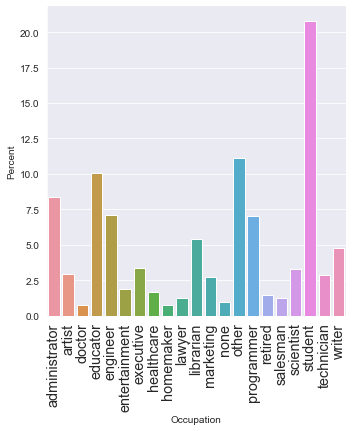

In [69]:
#
# Uniraviate plot of Occupation
#
plt.figure(figsize=(20,5))

occupation_chart = sns.catplot(
    x="occupation_id", 
    y="occupation_id", 
    kind="bar", 
    data=df_user, 
    estimator=lambda x: len(x)/len(df_user)*100
);

occupation_chart.set_axis_labels("Occupation", "Percent").set_xticklabels(xindex);

occupation_chart.set_xticklabels(
    rotation=90,
    fontweight='light',
    fontsize='x-large'
);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [70]:
df_movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995


In [71]:
# Group the movie data by Release Year
df_movie_pop = df_movie.groupby('release year').sum()

In [72]:
df_movie_pop.head()

,movie id,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
release year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,1542,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,617,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,656,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [73]:
# Drop "movie id" and "Num of genre" from the Data Frame
df_movie_pop = df_movie_pop.iloc[:,1:-1]

In [74]:
# A data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre)
df_movie_pop.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [75]:
# Get total number per year

In [76]:
# Find the total number of movies release in a year(use sum(axis=1) store that value in a new column as 'total'.
df_movie_pop['total'] = df_movie_pop.sum(axis=1)

In [77]:
# Divide the value of each genre in that year by total to get percentage number of release in a particular year. (df.div(df['total'], axis= 0) * 100)
df_movie_pop_per = (df_movie_pop.div(df_movie_pop['total'], axis= 0) * 100)

In [78]:
df_movie_pop_per

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,
1922,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1926,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1930,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1931,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,100.00
1932,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,50.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.50,3.68,1.13,4.25,23.23,2.27,2.55,27.48,0.85,0.00,2.27,0.57,0.57,9.92,1.98,7.08,1.98,1.70,100.00
1995,10.50,5.77,1.57,5.51,16.54,2.89,1.31,23.36,0.79,0.26,3.67,0.79,1.31,9.71,3.94,10.24,1.31,0.52,100.00
1996,7.87,4.29,1.61,3.76,19.32,3.76,3.22,30.41,1.07,0.18,1.97,1.61,1.07,6.80,2.68,8.41,1.61,0.36,100.00


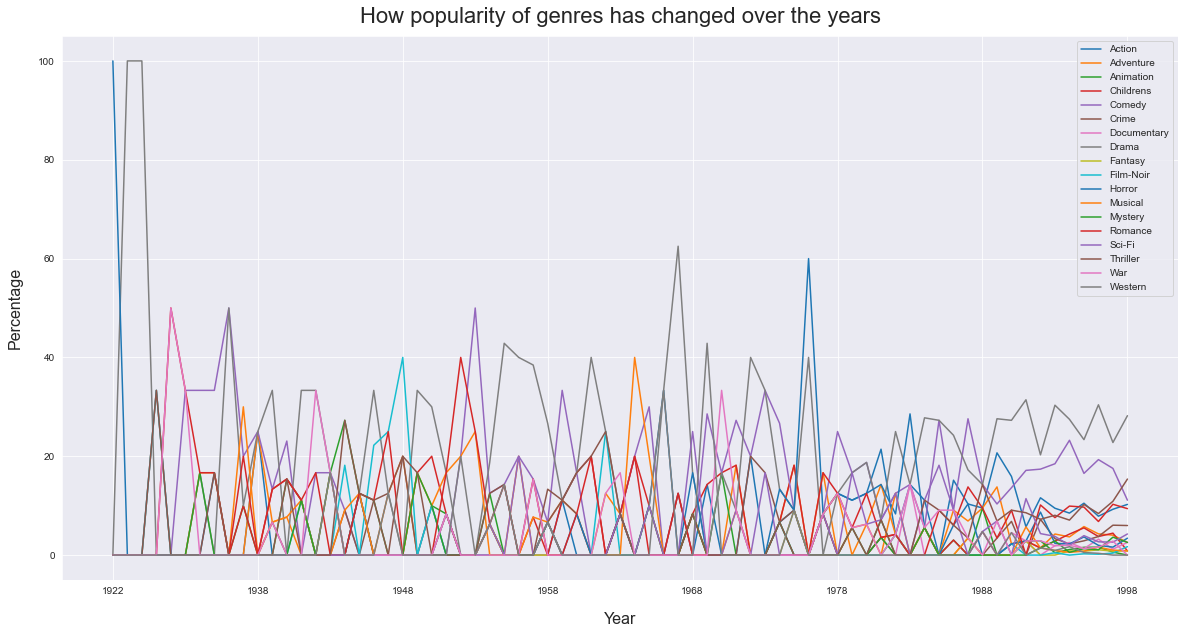

In [79]:
#
# How popularity of genres has changed over the years
#

# Remove column 'total' from the chart since it will be a line on 100%
# and plot the chart
df_movie_pop_per.iloc[:,:-1].plot(kind='line', figsize = (20,10))

# Title
plt.title("How popularity of genres has changed over the years", y=1.013, fontsize=22)

# Labels
plt.xlabel("Year", labelpad=16, fontsize=16)
plt.ylabel("Percentage", labelpad=16, fontsize=16); 

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [80]:
#
# 1. Find the count of ratings and average ratings for every movie.
#

In [81]:
df_rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [82]:
# Count of ratings
df_rating.groupby('movie id').count()['rating']

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64

In [83]:
# Average of ratings
df_rating.groupby('movie id').mean()

,user id,rating,timestamp
movie id,,,
1,477.01,3.88,"882,805,356.33"
2,492.01,3.21,"883,417,351.75"
3,459.13,3.03,"882,226,890.10"
4,469.50,3.55,"882,717,532.42"
5,439.37,3.30,"882,588,159.97"
...,...,...,...
1678,863.00,1.00,"889,289,570.00"
1679,863.00,3.00,"889,289,491.00"
1680,863.00,2.00,"889,289,570.00"


In [84]:
#
# 2. Slice the movies which have ratings more than 100.
#

In [85]:
df_rating.groupby('movie id').count()['rating'] > 100

movie id
1        True
2        True
3       False
4        True
5       False
        ...  
1678    False
1679    False
1680    False
1681    False
1682    False
Name: rating, Length: 1682, dtype: bool

In [86]:
df_rating_m100 = df_rating.groupby('movie id').mean()[df_rating.groupby('movie id').count()['rating'] > 100]['rating']

In [87]:
# Movies which have ratings more than 100.
df_rating_m100

movie id
1      3.88
2      3.21
4      3.55
7      3.80
8      4.00
       ... 
926    2.70
928    3.12
1016   3.46
1028   3.04
1047   2.84
Name: rating, Length: 334, dtype: float64

In [88]:
#
# 3. Sort values according to average rating such that movie which highest rating is on top.
#

In [89]:
# Average rating sorted by the rating such that movie which highest rating is on top.
df_rating_m100.sort_values(ascending=False)

movie id
408   4.49
318   4.47
169   4.47
483   4.46
64    4.45
      ... 
358   2.62
260   2.57
325   2.55
243   2.44
122   2.34
Name: rating, Length: 334, dtype: float64

In [90]:
#
# 4. Select top 25 movies.
#

In [91]:
df_ranking_m100_t25 = df_rating_m100.sort_values(ascending=False).iloc[0:25]

In [92]:
# Top 25 movies
df_ranking_m100_t25

movie id
408   4.49
318   4.47
169   4.47
483   4.46
64    4.45
603   4.39
12    4.39
50    4.36
178   4.34
134   4.29
427   4.29
357   4.29
98    4.29
480   4.28
127   4.28
285   4.27
272   4.26
657   4.26
474   4.25
174   4.25
479   4.25
313   4.25
511   4.23
484   4.21
172   4.20
Name: rating, dtype: float64

In [93]:
#
# 5. You will have to use the .merge() function to get the movie titles.
#

In [94]:
df_movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995


In [95]:
# Merge to get the movie titles
df_merged = df_movie.merge(df_ranking_m100_t25, how='right', right_index=True, left_on="movie id", right_on="movie id").reset_index()

In [96]:
#
# The top 25 movies according to average ratings such that each movie has number of ratings more than 100
#
df_merged[["movie id", "movie title", "release year", "rating"]]

,movie id,movie title,release year,rating
0,408,"Close Shave, A",1996,4.49
1,318,Schindler's List,1993,4.47
2,169,"Wrong Trousers, The",1993,4.47
3,483,Casablanca,1942,4.46
4,64,"Shawshank Redemption, The",1994,4.45
5,603,Rear Window,1954,4.39
6,12,"Usual Suspects, The",1995,4.39
7,50,Star Wars,1977,4.36
8,178,12 Angry Men,1957,4.34
9,134,Citizen Kane,1941,4.29


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want to use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [97]:
#
# Merge all the datasets
#

In [98]:
df_rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [99]:
df_user.head()

,user id,age,occupation,zip code,gender_F,gender_M,occupation_id
0,1,24,technician,85711,0,1,19
1,2,53,other,94043,1,0,13
2,3,23,writer,32067,0,1,20
3,4,24,technician,43537,0,1,19
4,5,33,other,15213,1,0,13


In [100]:
df_movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995


In [101]:
# Merge df_rating and df_user
df_AB = df_rating.merge(df_user, how='left', on="user id")

In [102]:
df_AB.head()

,user id,movie id,rating,timestamp,age,occupation,zip code,gender_F,gender_M,occupation_id
0,196,242,3,881250949,49,writer,55105,0,1,20
1,186,302,3,891717742,39,executive,00000,1,0,6
2,22,377,1,878887116,25,writer,40206,0,1,20
3,244,51,2,880606923,28,technician,80525,0,1,19
4,166,346,1,886397596,47,educator,55113,0,1,3


In [103]:
df_AB.count()

user id          100000
movie id         100000
rating           100000
timestamp        100000
age              100000
occupation       100000
zip code         100000
gender_F         100000
gender_M         100000
occupation_id    100000
dtype: int64

In [104]:
# Merge df_movie on it
df_merged = df_AB.merge(df_movie, how='left', on="movie id")

In [105]:
df_merged.head()

,user id,movie id,rating,timestamp,age,occupation,zip code,gender_F,gender_M,occupation_id,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year
0,196,242,3,881250949,49,writer,55105,0,1,20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1997
1,186,302,3,891717742,39,executive,00000,1,0,6,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,4.00,1997
2,22,377,1,878887116,25,writer,40206,0,1,20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1994
3,244,51,2,880606923,28,technician,80525,0,1,19,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,4.00,1994
4,166,346,1,886397596,47,educator,55113,0,1,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1997


In [106]:
# Seems like there are some columns which will not be used in this analysis
# Also, there are 10 NaN data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user id        100000 non-null  int64  
 1   movie id       100000 non-null  int64  
 2   rating         100000 non-null  int64  
 3   timestamp      100000 non-null  int64  
 4   age            100000 non-null  int64  
 5   occupation     100000 non-null  object 
 6   zip code       100000 non-null  object 
 7   gender_F       100000 non-null  uint8  
 8   gender_M       100000 non-null  uint8  
 9   occupation_id  100000 non-null  int64  
 10  movie title    99990 non-null   object 
 11  release date   99990 non-null   object 
 12  Action         99990 non-null   float64
 13  Adventure      99990 non-null   float64
 14  Animation      99990 non-null   float64
 15  Childrens      99990 non-null   float64
 16  Comedy         99990 non-null   float64
 17  Crime          99990 non-null 

In [107]:
# Drop columns which are not related to this analysis
df_merged.drop(["timestamp", "age", "occupation", "zip code", "occupation_id", "release date", "release year"], axis=1, inplace=True)

In [108]:
# Unrelated columns were dropped
# It seems like there are 10 NaN data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user id       100000 non-null  int64  
 1   movie id      100000 non-null  int64  
 2   rating        100000 non-null  int64  
 3   gender_F      100000 non-null  uint8  
 4   gender_M      100000 non-null  uint8  
 5   movie title   99990 non-null   object 
 6   Action        99990 non-null   float64
 7   Adventure     99990 non-null   float64
 8   Animation     99990 non-null   float64
 9   Childrens     99990 non-null   float64
 10  Comedy        99990 non-null   float64
 11  Crime         99990 non-null   float64
 12  Documentary   99990 non-null   float64
 13  Drama         99990 non-null   float64
 14  Fantasy       99990 non-null   float64
 15  Film-Noir     99990 non-null   float64
 16  Horror        99990 non-null   float64
 17  Musical       99990 non-null   float64
 18  Myste

In [109]:
df_merged

,user id,movie id,rating,gender_F,gender_M,movie title,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
0,196,242,3,0,1,Kolya,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,186,302,3,1,0,L.A. Confidential,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,4.00
2,22,377,1,0,1,Heavyweights,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
3,244,51,2,0,1,Legends of the Fall,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,4.00
4,166,346,1,0,1,Jackie Brown,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,0,1,"First Wives Club, The",0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
99996,716,204,5,1,0,Back to the Future,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00
99997,276,1090,1,0,1,Sliver,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
99998,13,225,2,0,1,101 Dalmatians,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


In [110]:
# Find unmatched data by isnull.
# There are no data for movie id=267 and id=1373
df_merged[df_merged['movie title'].isnull()]

,user id,movie id,rating,gender_F,gender_M,movie title,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
2172,130,267,5,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3781,5,267,4,1,0,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7245,268,267,3,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8567,181,1373,1,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
12475,297,267,3,1,0,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
14756,319,267,4,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
15292,1,267,4,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
49295,532,267,3,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
93523,833,267,1,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
99723,422,267,4,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [111]:
df_merged[df_merged['movie id']==1373]

,user id,movie id,rating,gender_F,gender_M,movie title,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
8567,181,1373,1,0,1,NaN,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [112]:
# There was no movie data even in the original csv file
df_movie[df_movie['movie id']==267]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year


In [113]:
# This data was dropped because of unknown genre
df_movie[df_movie['movie id']==1373]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre,release year


In [114]:
# Drop NaN data
df_merged = df_merged[~df_merged['movie title'].isnull()]
df_merged[df_merged['movie title'].isnull()]

,user id,movie id,rating,gender_F,gender_M,movie title,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre


In [115]:
# NaN data were successfully dropped
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user id       99990 non-null  int64  
 1   movie id      99990 non-null  int64  
 2   rating        99990 non-null  int64  
 3   gender_F      99990 non-null  uint8  
 4   gender_M      99990 non-null  uint8  
 5   movie title   99990 non-null  object 
 6   Action        99990 non-null  float64
 7   Adventure     99990 non-null  float64
 8   Animation     99990 non-null  float64
 9   Childrens     99990 non-null  float64
 10  Comedy        99990 non-null  float64
 11  Crime         99990 non-null  float64
 12  Documentary   99990 non-null  float64
 13  Drama         99990 non-null  float64
 14  Fantasy       99990 non-null  float64
 15  Film-Noir     99990 non-null  float64
 16  Horror        99990 non-null  float64
 17  Musical       99990 non-null  float64
 18  Mystery       99990 non-nu

In [116]:
#
# Men watch more drama than women ?
#

In [117]:
df_merged.head()

,user id,movie id,rating,gender_F,gender_M,movie title,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
0,196,242,3,0,1,Kolya,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,186,302,3,1,0,L.A. Confidential,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,4.00
2,22,377,1,0,1,Heavyweights,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
3,244,51,2,0,1,Legends of the Fall,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,4.00
4,166,346,1,0,1,Jackie Brown,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


In [118]:
# Gender_M = 1 -> Male
# Gender_M = 0 -> Female
#
# Total number of ratings to each categories received by men / women are determined by sum() (each genre has 1 point)
# Each row in df_merged represents 1 rating.
# For each rating, user and movie name are tied.
# Because each movie may belong to multiple genre and one movie can rated by multiple people,
# the total of "Num of genre" does not match with total number of rating ("Num of genre" in here doesn't mean anything).
# From "Action" column to "Western" column represents number of rating posted for those genre.
df_merged.groupby('gender_M').sum()

,user id,movie id,rating,gender_F,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
gender_M,,,,,,,,,,,,,,,,,,,,,
0,12225832,11452645,90894,"25,738.00","5,442.00","3,141.00",995.00,"2,232.00","8,068.00","1,794.00",...,385.00,"1,197.00","1,442.00","1,314.00","5,858.00","2,629.00","5,086.00","2,189.00",371.00,"53,701.00"
1,34019655,31096592,262060,0.00,"20,147.00","10,612.00","2,610.00","4,950.00","21,764.00","6,261.00",...,"1,348.00","4,120.00","3,512.00","3,931.00","13,603.00","10,101.00","16,786.00","7,209.00","1,483.00","158,884.00"


In [119]:
# Total number of ratings received by men / women are determined by count() -> 'Num of genre' column
df_merged.groupby('gender_M').count()

,user id,movie id,rating,gender_F,movie title,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Num of genre
gender_M,,,,,,,,,,,,,,,,,,,,,
0,25738,25738,25738,25738,25738,25738,25738,25738,25738,25738,...,25738,25738,25738,25738,25738,25738,25738,25738,25738,25738
1,74252,74252,74252,74252,74252,74252,74252,74252,74252,74252,...,74252,74252,74252,74252,74252,74252,74252,74252,74252,74252


In [120]:
# Get the total number of ratings received by Female directly
df_merged[df_merged['gender_M']==0].count()['Num of genre']

25738

In [121]:
# Memo(copy from the instruction):
# "Use number of ratings to validate the numbers. 
# For example, if out of 4000 ratings received by women, 
# 3000 are for drama, we will assume that 75% of the women watch drama."

In [122]:
# Number of ratings from "Female" to "Drama"
df_merged.groupby(['gender_F','Drama'])['Drama'].sum()

gender_F  Drama
0         0.00         0.00
          1.00    28,887.00
1         0.00         0.00
          1.00    11,008.00
Name: Drama, dtype: float64

In [123]:
# Get the number of ratings from "Female" to "Drama" directly
df_merged[(df_merged['gender_F']==1) & (df_merged['Drama']==1)].sum()['Drama']

11008.0

In [124]:
#
# Percentage of women watch drama
#
df_merged[(df_merged['gender_F']==1) & (df_merged['Drama']==1)].sum()['Drama'] / df_merged[df_merged['gender_F']==1].count()['Num of genre'] * 100

42.76944595539669

In [125]:
#
# Percentage of men watch drama
#

df_merged[(df_merged['gender_F']==0) & (df_merged['Drama']==1)].sum()['Drama'] / df_merged[df_merged['gender_F']==0].count()['Num of genre'] * 100

38.90400258578893

In [126]:
#
# % of women watch drame (42.8%) > % of men watch drama (38.9%)
#
# "Men watch more drama than women" => Not True

In [127]:
# 
# Sci-Fi
# 

In [128]:
#
# Percentage of women watch Sci-Fi
#
df_merged[(df_merged['gender_F']==1) & (df_merged['Sci-Fi']==1)].sum()['Sci-Fi'] / df_merged[df_merged['gender_F']==1].count()['Num of genre'] * 100

10.214468878700753

In [129]:
#
# Percentage of men watch Sci-Fi
#
df_merged[(df_merged['gender_F']==0) & (df_merged['Sci-Fi']==1)].sum()['Sci-Fi'] / df_merged[df_merged['gender_F']==0].count()['Num of genre'] * 100

13.603673975111782

In [130]:
#
# % of women watch Sci-Fi (10.2%) < % of men watch Sci-Fi (13.6%)
#
# "Women watch more Sci-Fi than men" => Not True

In [131]:
#
# Romance
#

In [132]:
#
# Percentage of women watch Romance
#
df_merged[(df_merged['gender_F']==1) & (df_merged['Romance']==1)].sum()['Romance'] / df_merged[df_merged['gender_F']==1].count()['Num of genre'] * 100

22.760121221540135

In [133]:
#
# Percentage of men watch Romance
#
df_merged[(df_merged['gender_F']==0) & (df_merged['Romance']==1)].sum()['Romance'] / df_merged[df_merged['gender_F']==0].count()['Num of genre'] * 100

18.320045251306365

In [134]:
#
# % of women watch Romance (22.8%) > % of men watch Romance (18.3%)
#
# "Men watch more Romance than women" => Not True

### Github

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-KokiTabayashi.git